In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


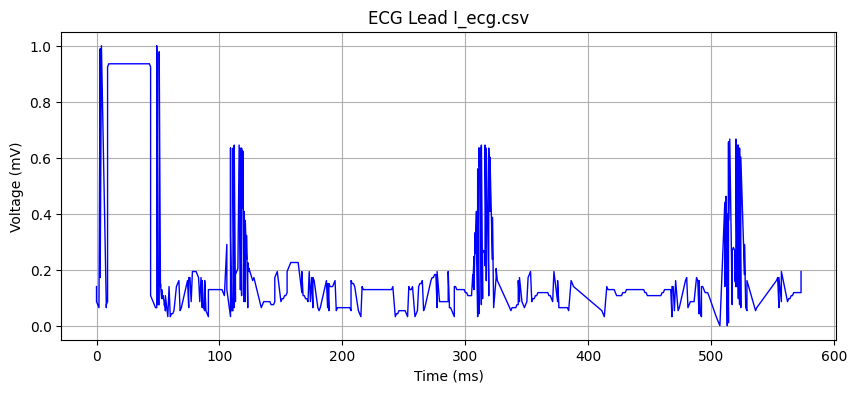

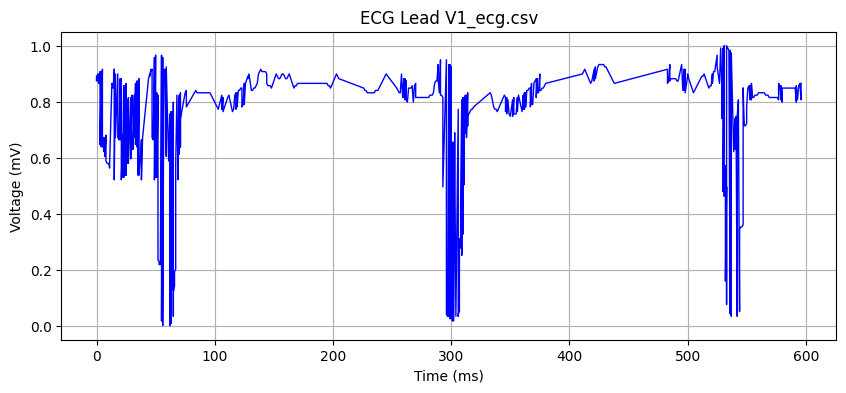

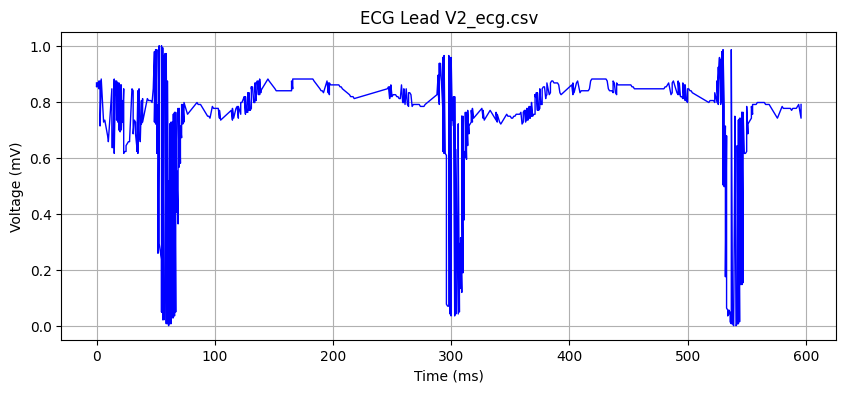

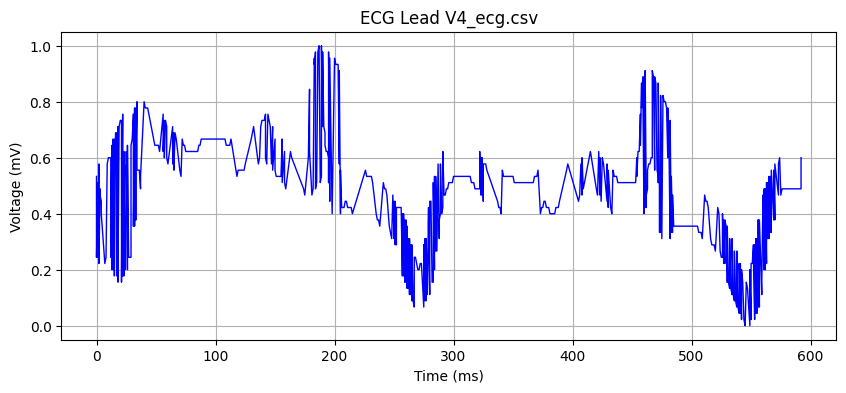

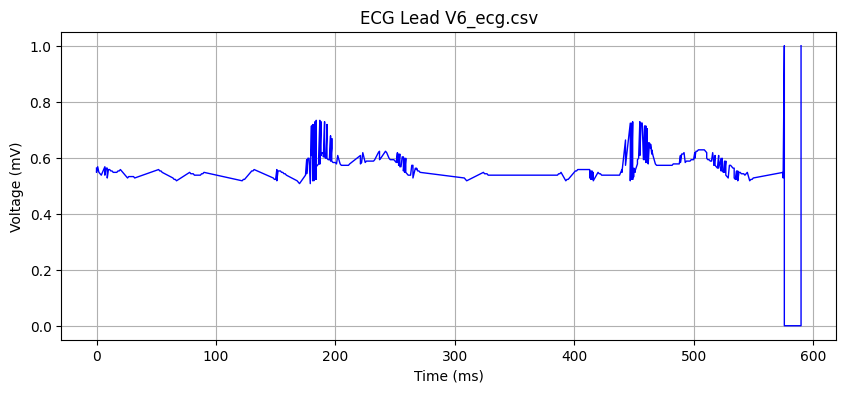

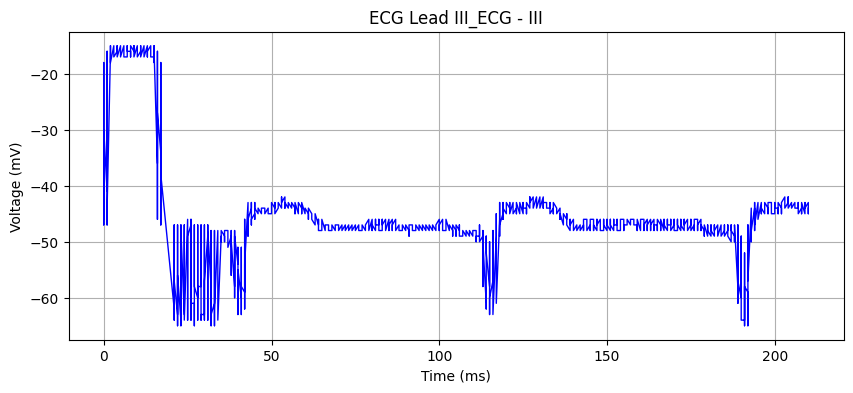

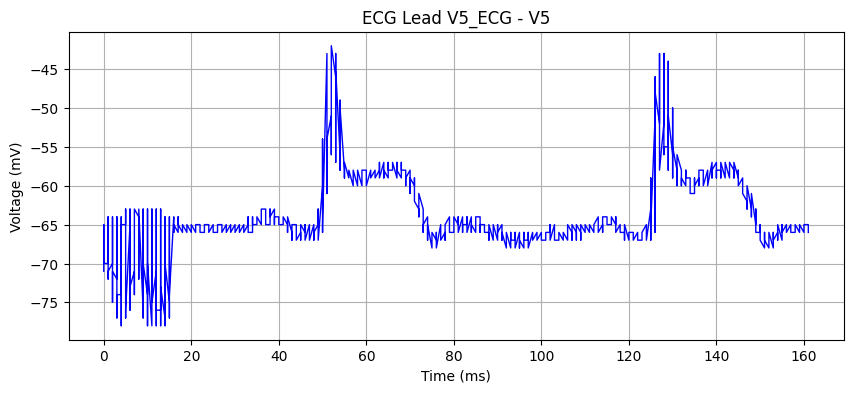

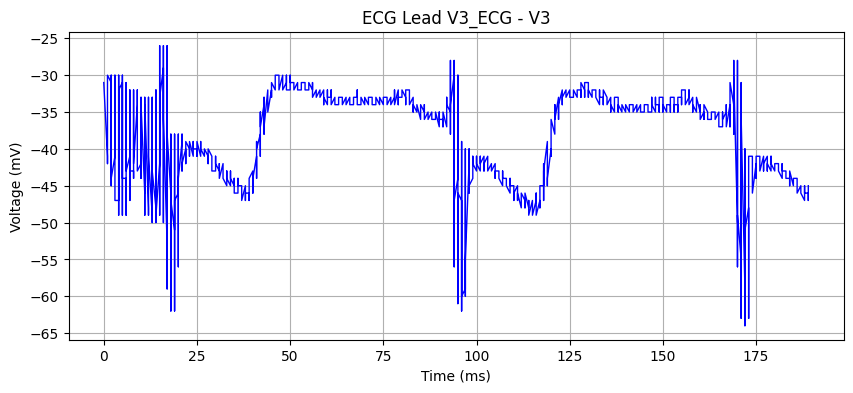

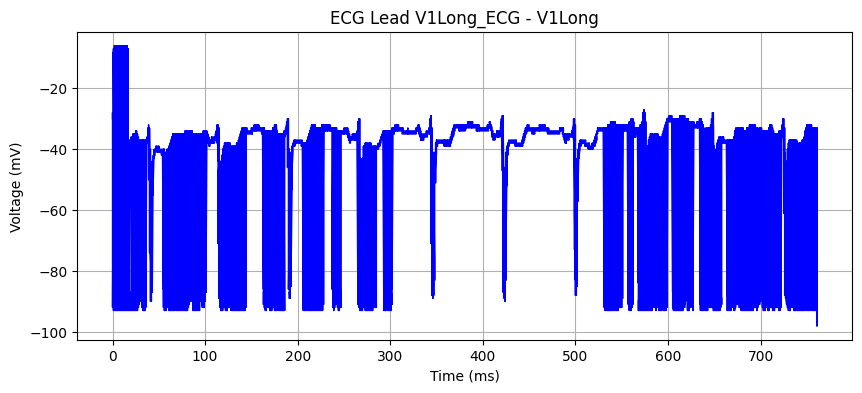

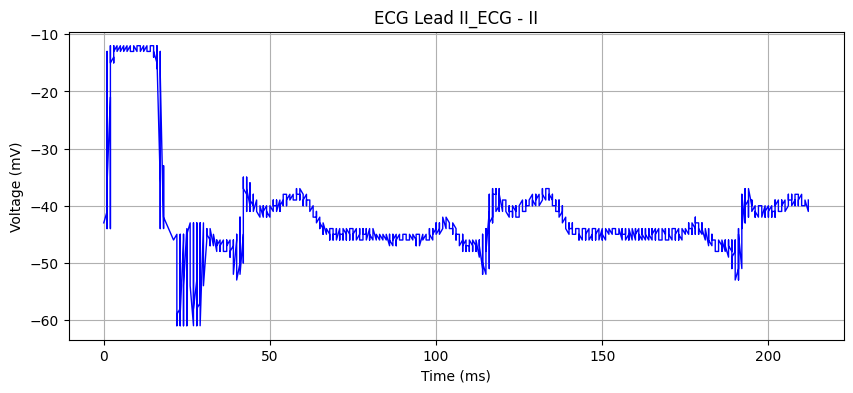

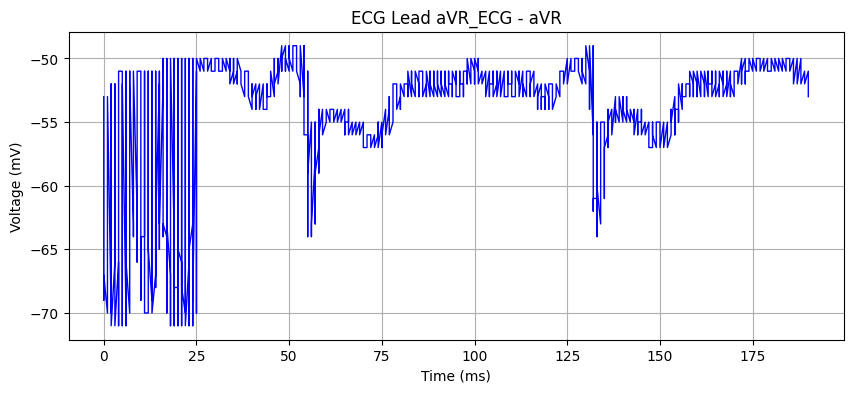

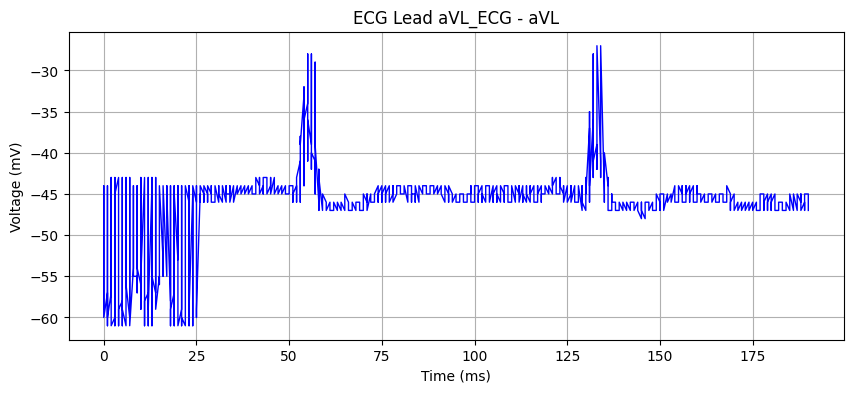

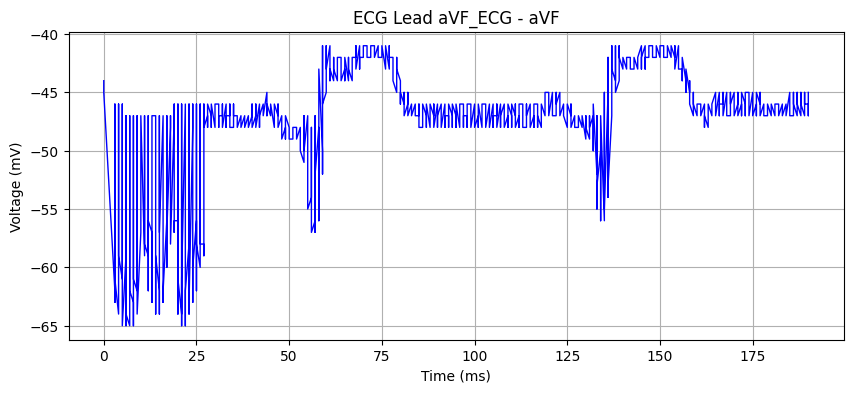

In [8]:
folder_path="/content/drive/MyDrive/Model_Exp/ECG Pic to Time Series"

import pandas as pd
import matplotlib.pyplot as plt
import os
from glob import glob

folder_path="/content/drive/MyDrive/Model_Exp/ECG Pic to Time Series"
"""
Load and plot all ECG signals from CSV files in a folder.

Parameters:
folder_path (str): Path to the folder containing ECG CSV files.
"""
# Find all CSV files in the folder
csv_files = glob(os.path.join(folder_path, "*.csv"))


# Loop through each CSV file and plot
for file in csv_files:
    lead_name = os.path.basename(file).replace("_ECG.csv", "")  # Extract lead name from filename
    df = pd.read_csv(file)

    plt.figure(figsize=(10, 4))
    plt.plot(df["Time"], df["Voltage"], color='b', linewidth=1)
    plt.xlabel("Time (ms)")
    plt.ylabel("Voltage (mV)")
    plt.title(f"ECG Lead {lead_name}")
    plt.grid()
    plt.show()



I_ecg.csv shape: (389, 2)


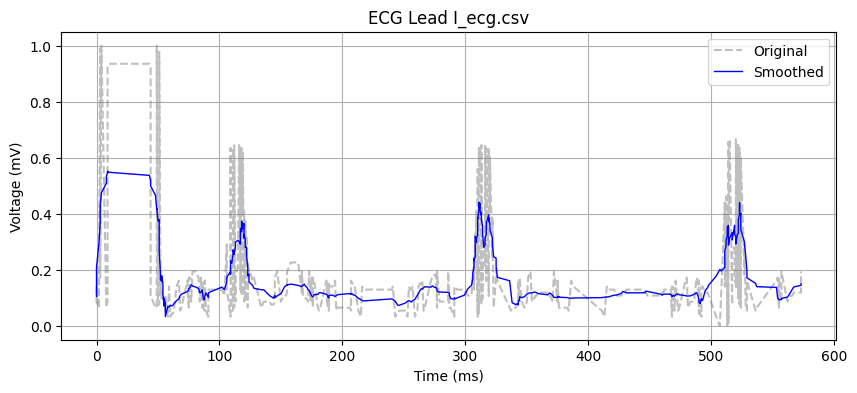

V1_ecg.csv shape: (542, 2)


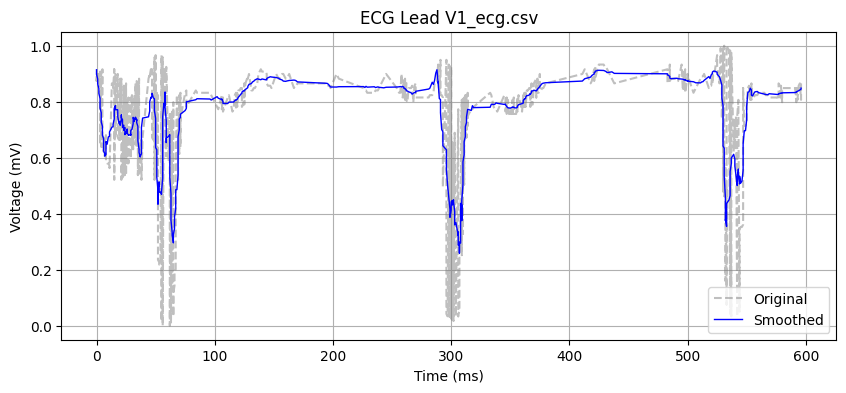

V2_ecg.csv shape: (658, 2)


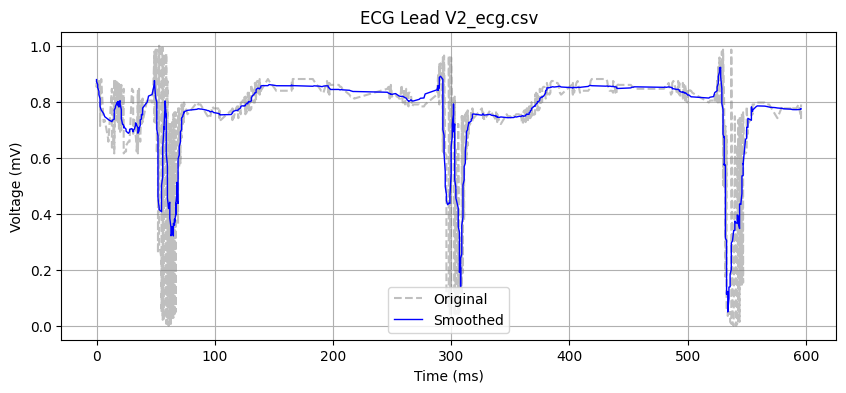

V4_ecg.csv shape: (489, 2)


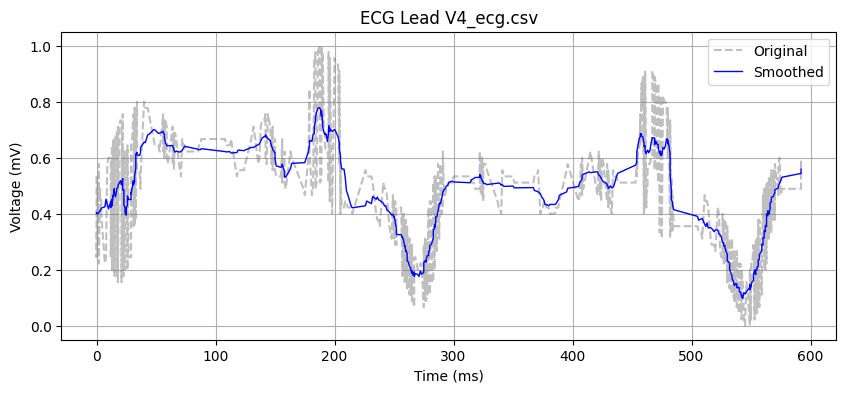

V6_ecg.csv shape: (307, 2)


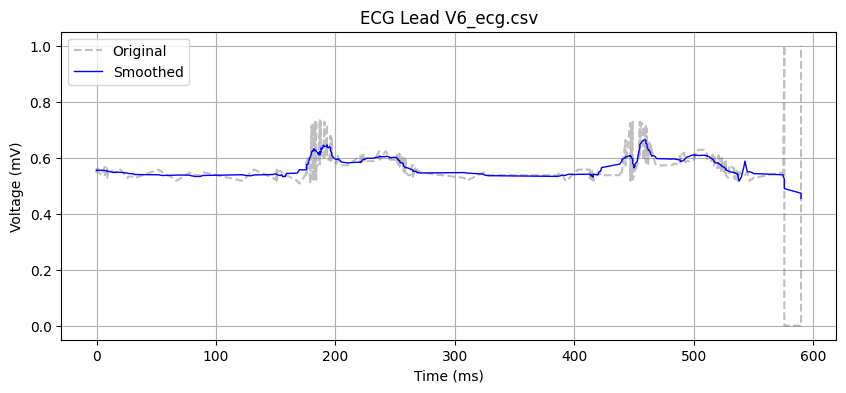

III_ECG - III shape: (970, 2)


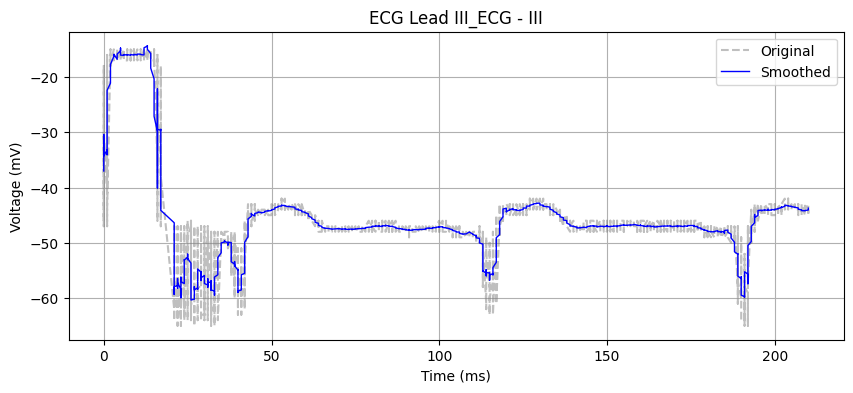

V5_ECG - V5 shape: (689, 2)


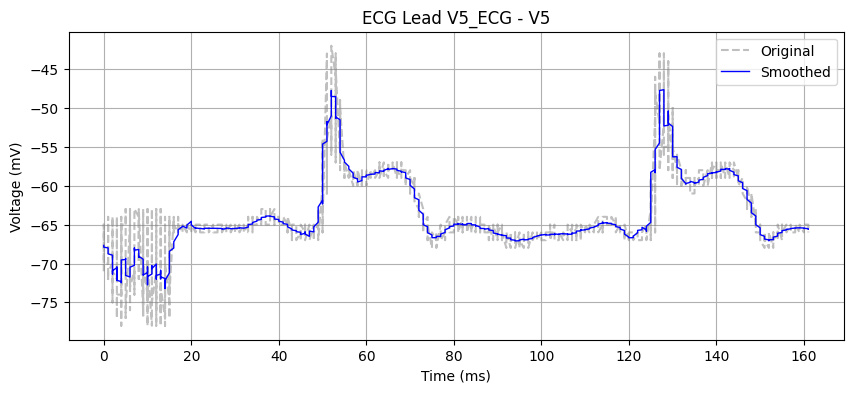

V3_ECG - V3 shape: (991, 2)


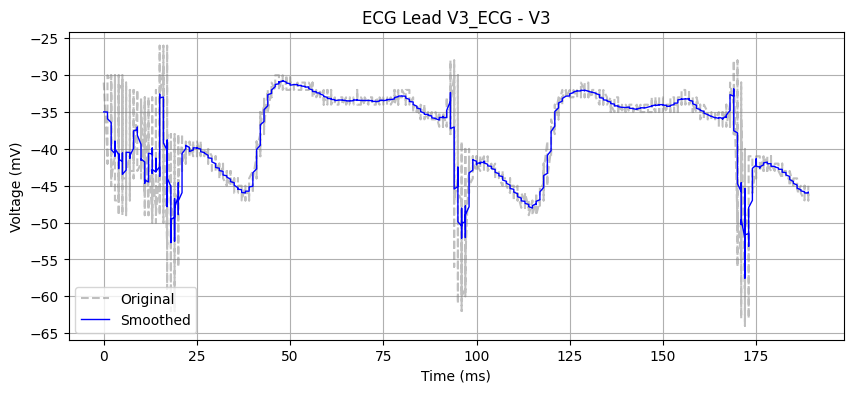

V1Long_ECG - V1Long shape: (7540, 2)


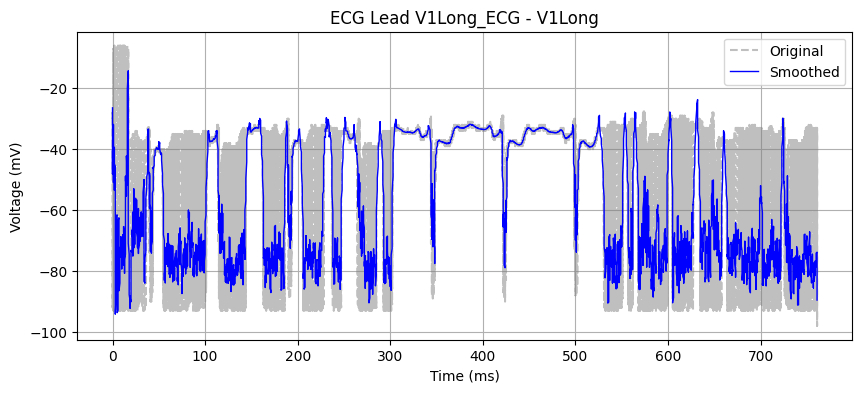

II_ECG - II shape: (868, 2)


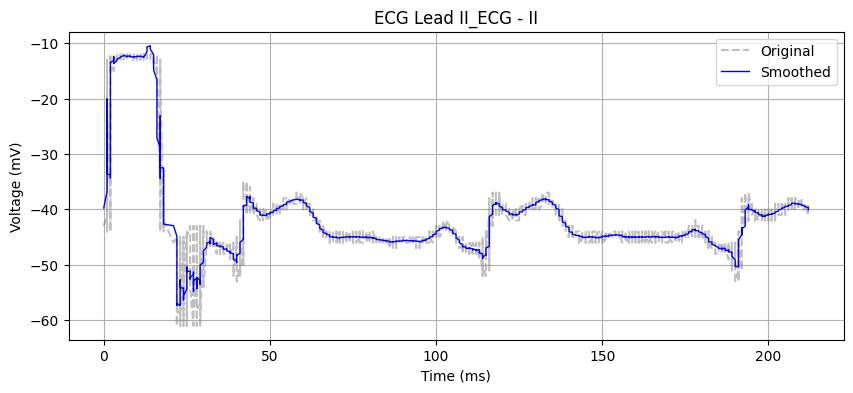

aVR_ECG - aVR shape: (763, 2)


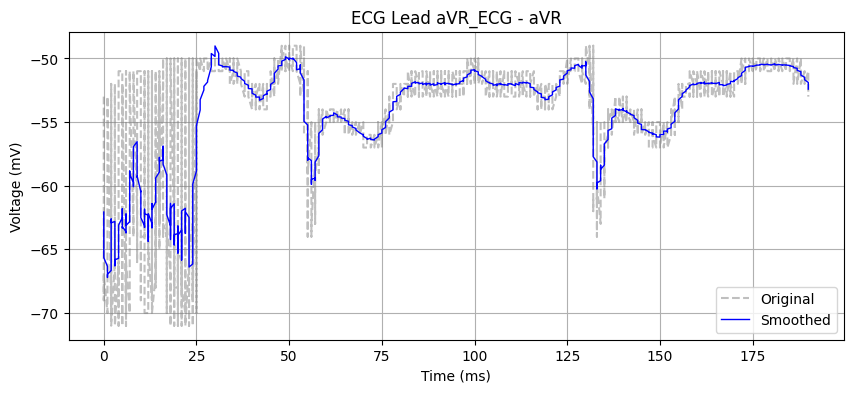

aVL_ECG - aVL shape: (761, 2)


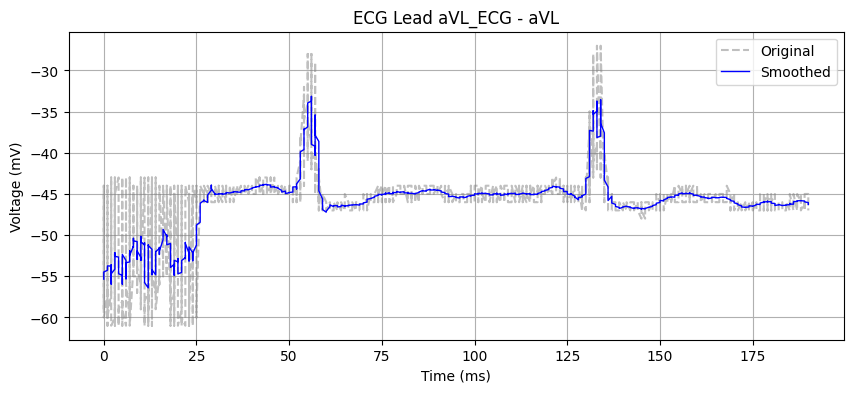

aVF_ECG - aVF shape: (758, 2)


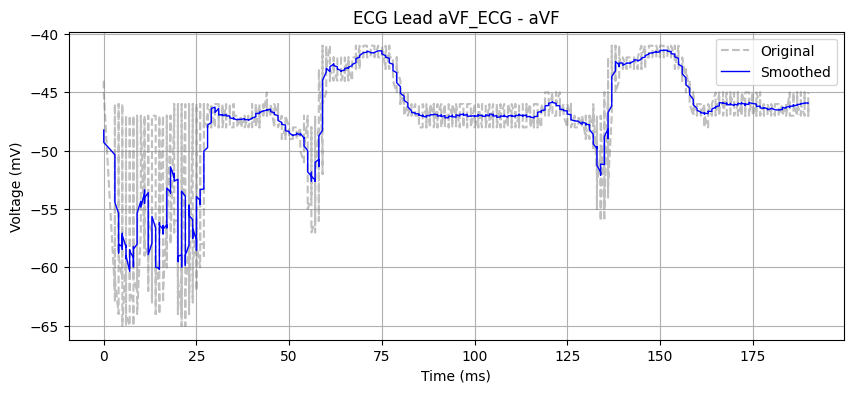

In [13]:
#Smooth filter

from scipy.signal import savgol_filter

# Loop through each CSV file and plot
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Loop through all ECG CSV files
for file in csv_files:
    lead_name = os.path.basename(file).replace("_ECG.csv", "")  # Extract lead name from filename

    # Load the CSV file
    df = pd.read_csv(file)

    # Convert to NumPy array
    numpy_array = df.to_numpy()
    print(f"{lead_name} shape:", numpy_array.shape)

    # Apply Savitzky-Golay smoothing filter
    smoothed_signal = savgol_filter(numpy_array[:, 1], window_length=25, polyorder=3)

    # Plot original and smoothed signals
    plt.figure(figsize=(10, 4))
    plt.plot(numpy_array[:, 0], numpy_array[:, 1], color='gray', linestyle='dashed', alpha=0.5, label="Original")
    plt.plot(numpy_array[:, 0], smoothed_signal, color='b', linewidth=1, label="Smoothed")

    plt.xlabel("Time (ms)")
    plt.ylabel("Voltage (mV)")
    plt.title(f"ECG Lead {lead_name}")
    plt.legend()
    plt.grid()
    plt.show()


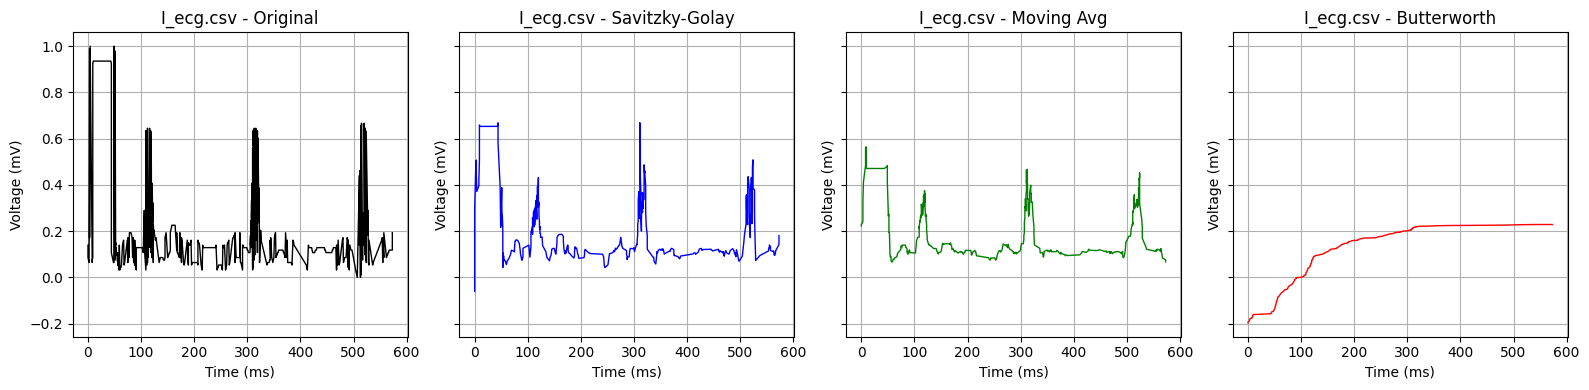

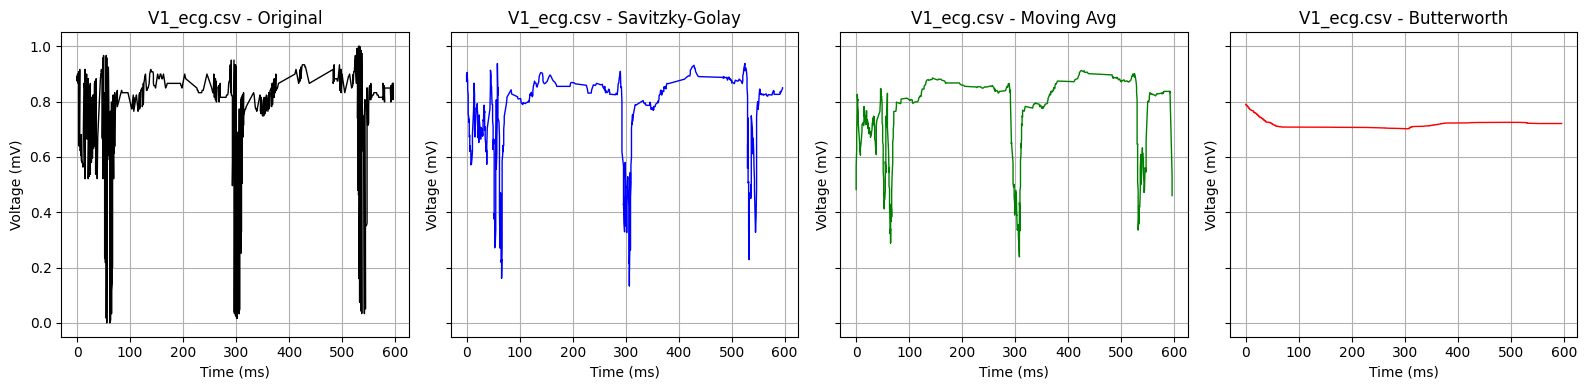

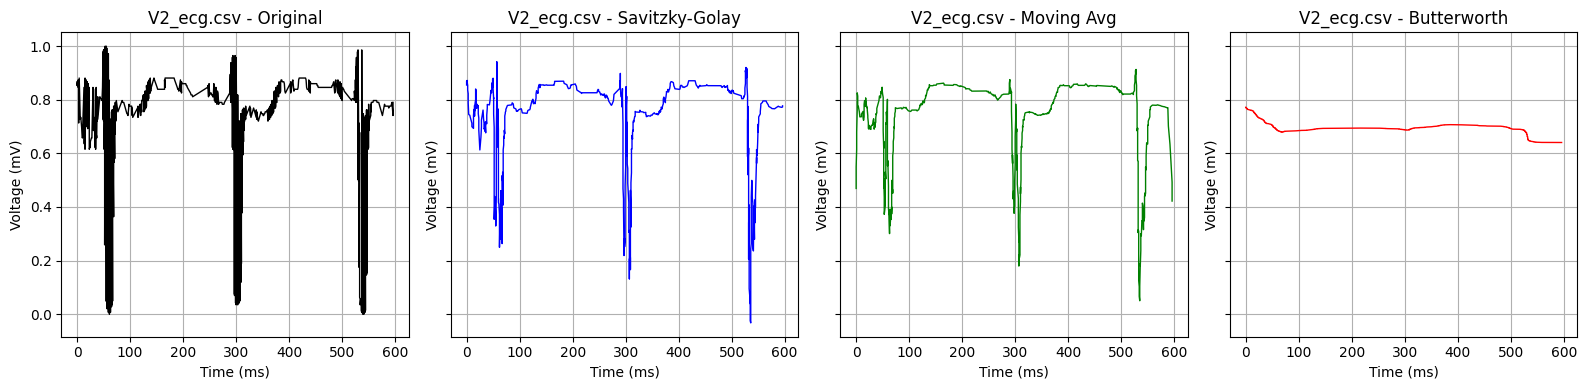

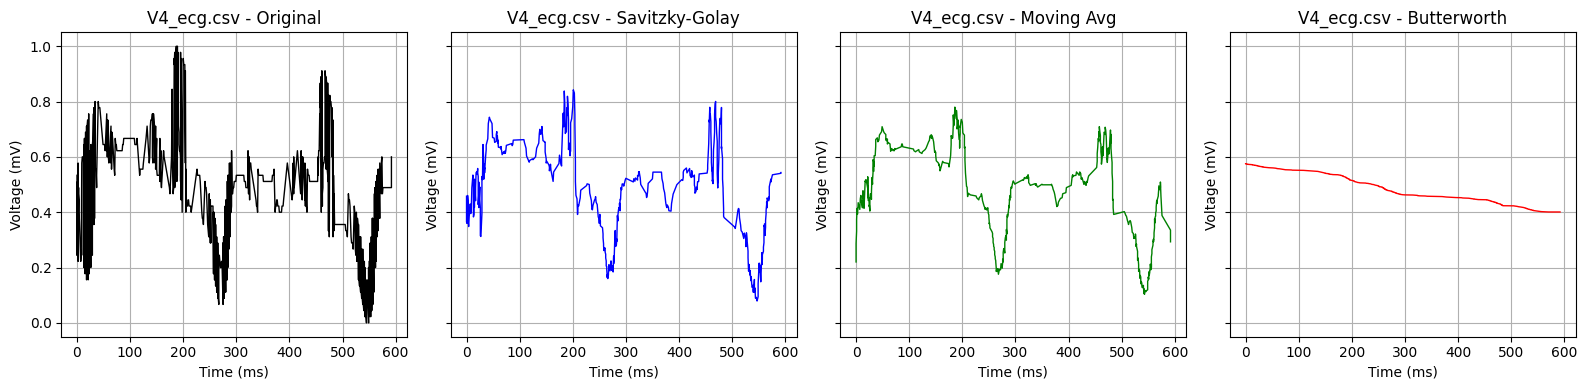

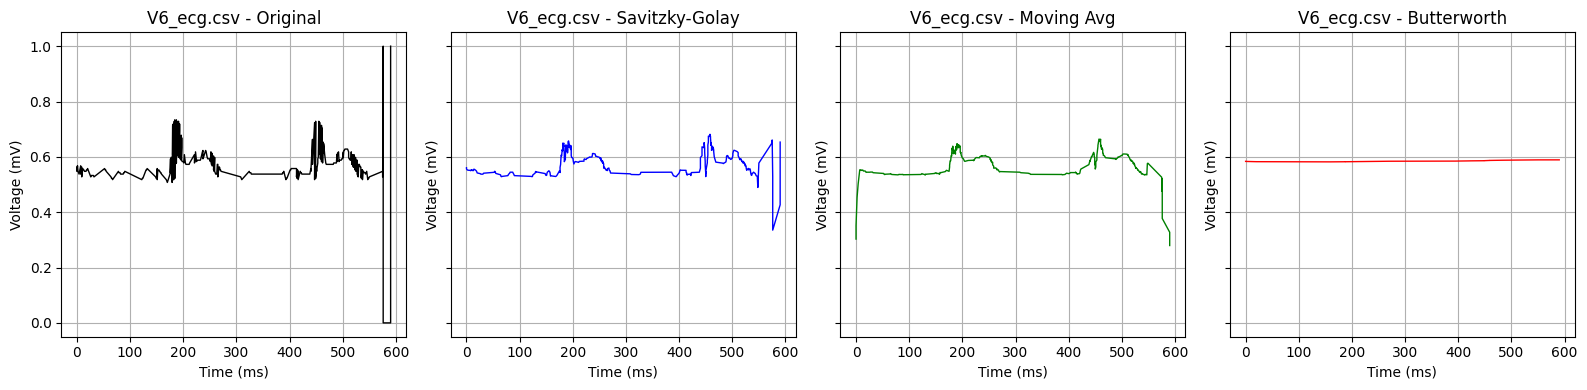

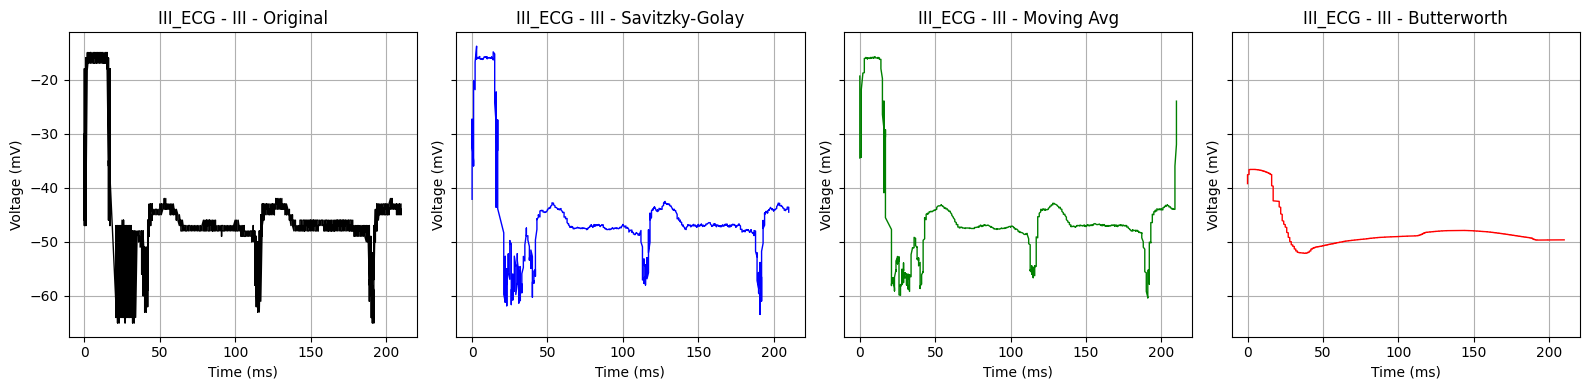

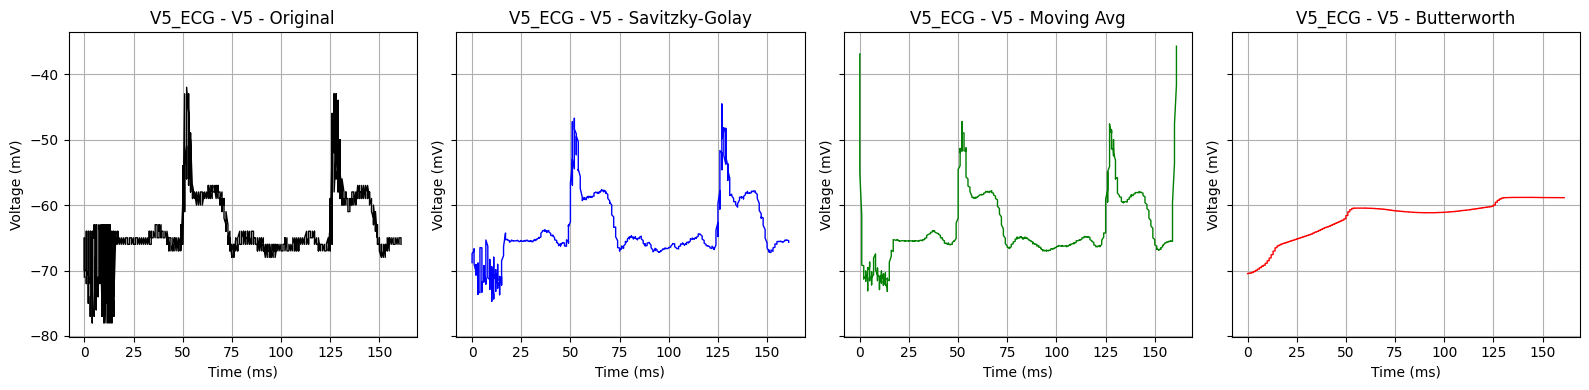

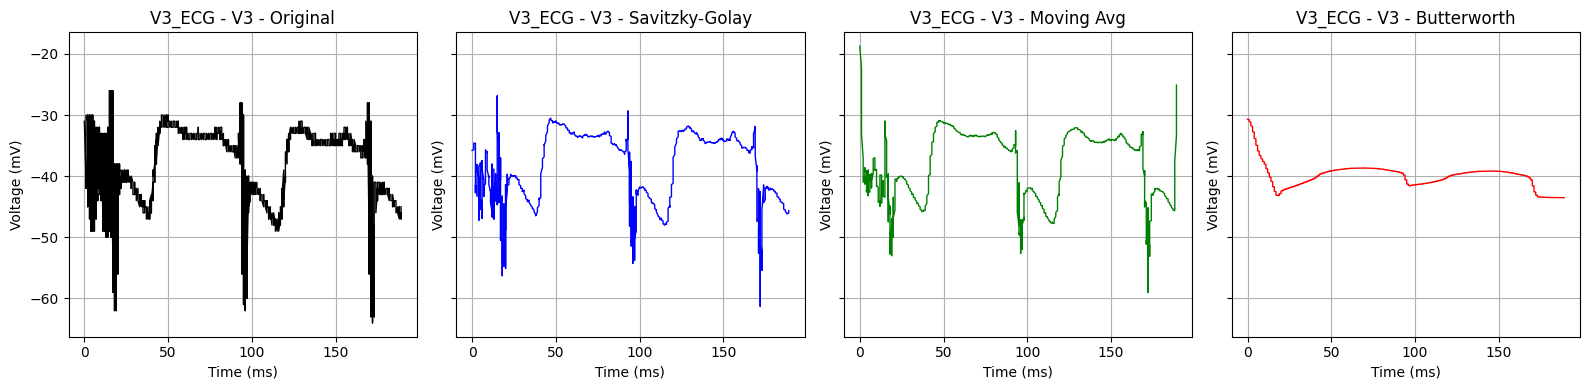

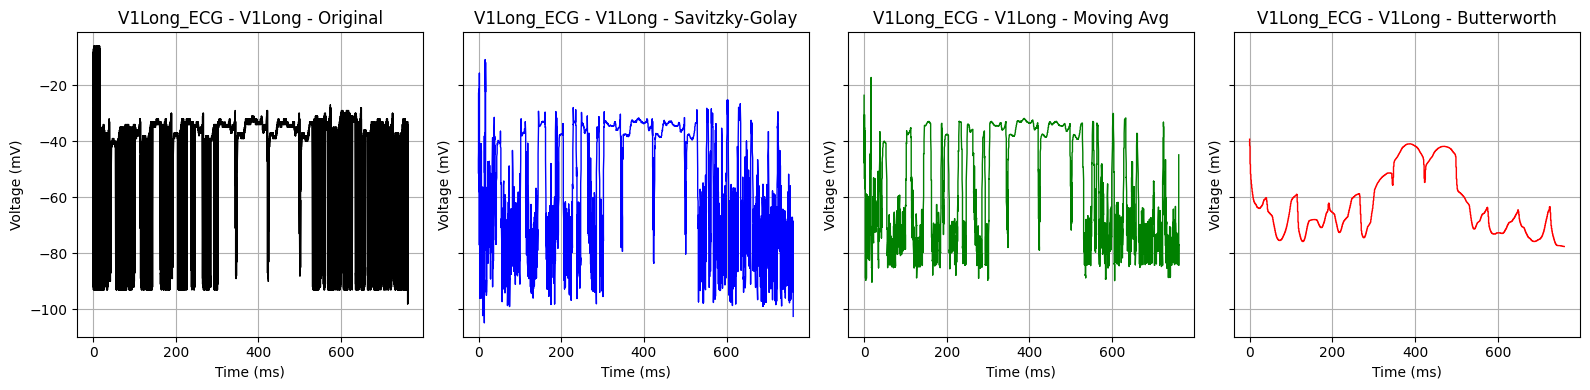

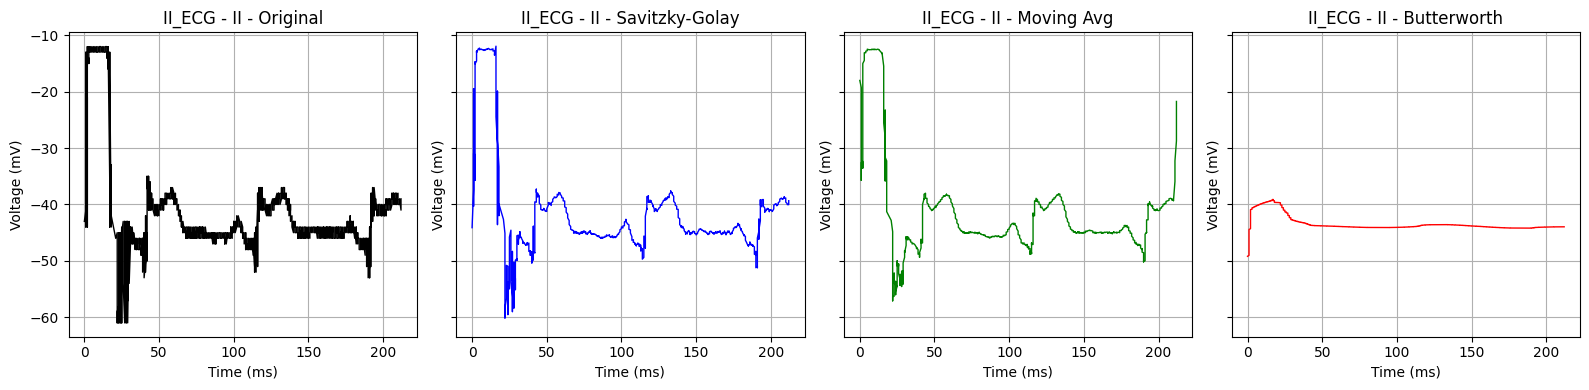

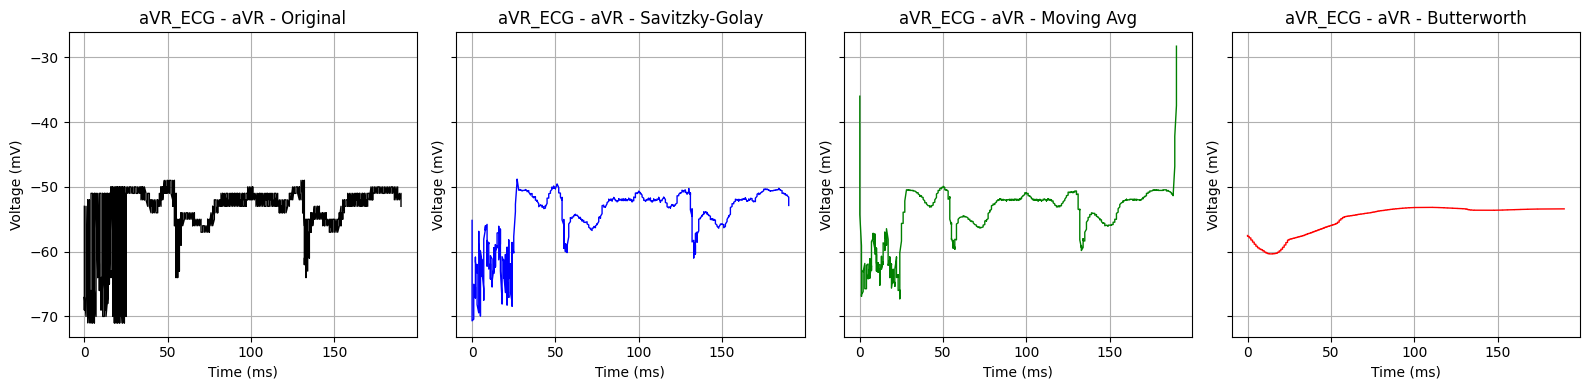

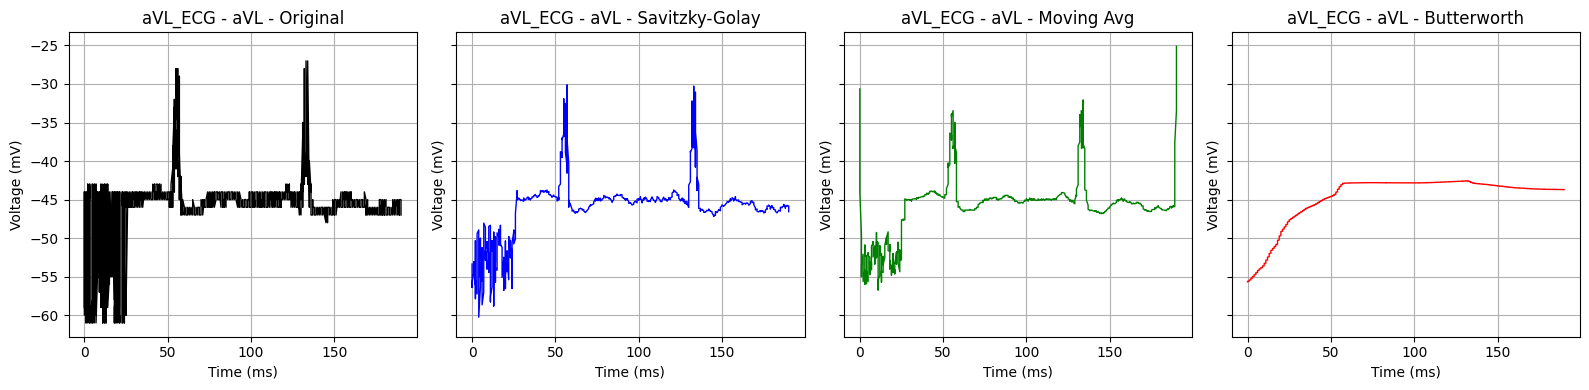

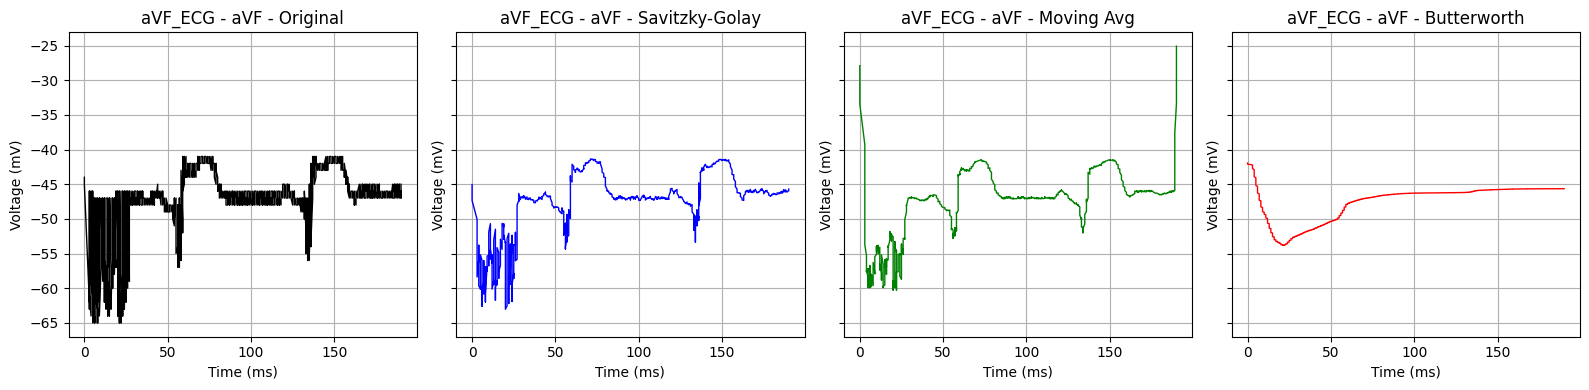

In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter, butter, filtfilt

# Moving Average Filter Function
def moving_average(signal, window_size=11):
    return np.convolve(signal, np.ones(window_size)/window_size, mode='same')

# Butterworth Low-Pass Filter Function
def butter_lowpass_filter(signal, cutoff=2.0, fs=1000.0, order=2):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, signal)

# Loop through all ECG CSV files
for file in csv_files:
    lead_name = os.path.basename(file).replace("_ECG.csv", "")  # Extract lead name from filename

    # Load the CSV file
    df = pd.read_csv(file)
    numpy_array = df.to_numpy()

    # Extract time and voltage signals
    time = numpy_array[:, 0]
    voltage = numpy_array[:, 1]

    # Apply Smoothing Filters
    savgol_smoothed = savgol_filter(voltage, window_length=11, polyorder=3)
    moving_avg_smoothed = moving_average(voltage, window_size=11)
    butter_smoothed = butter_lowpass_filter(voltage, cutoff=2.0, fs=1000.0, order=2)

    # Plot Original & Smoothed Signals Side-by-Side
    fig, axs = plt.subplots(1, 4, figsize=(16, 4), sharex=True, sharey=True)

    axs[0].plot(time, voltage, color='black', linewidth=1)
    axs[0].set_title(f"{lead_name} - Original")

    axs[1].plot(time, savgol_smoothed, color='blue', linewidth=1)
    axs[1].set_title(f"{lead_name} - Savitzky-Golay")

    axs[2].plot(time, moving_avg_smoothed, color='green', linewidth=1)
    axs[2].set_title(f"{lead_name} - Moving Avg")

    axs[3].plot(time, butter_smoothed, color='red', linewidth=1)
    axs[3].set_title(f"{lead_name} - Butterworth")

    for ax in axs:
        ax.set_xlabel("Time (ms)")
        ax.set_ylabel("Voltage (mV)")
        ax.grid()

    plt.tight_layout()
    plt.show()


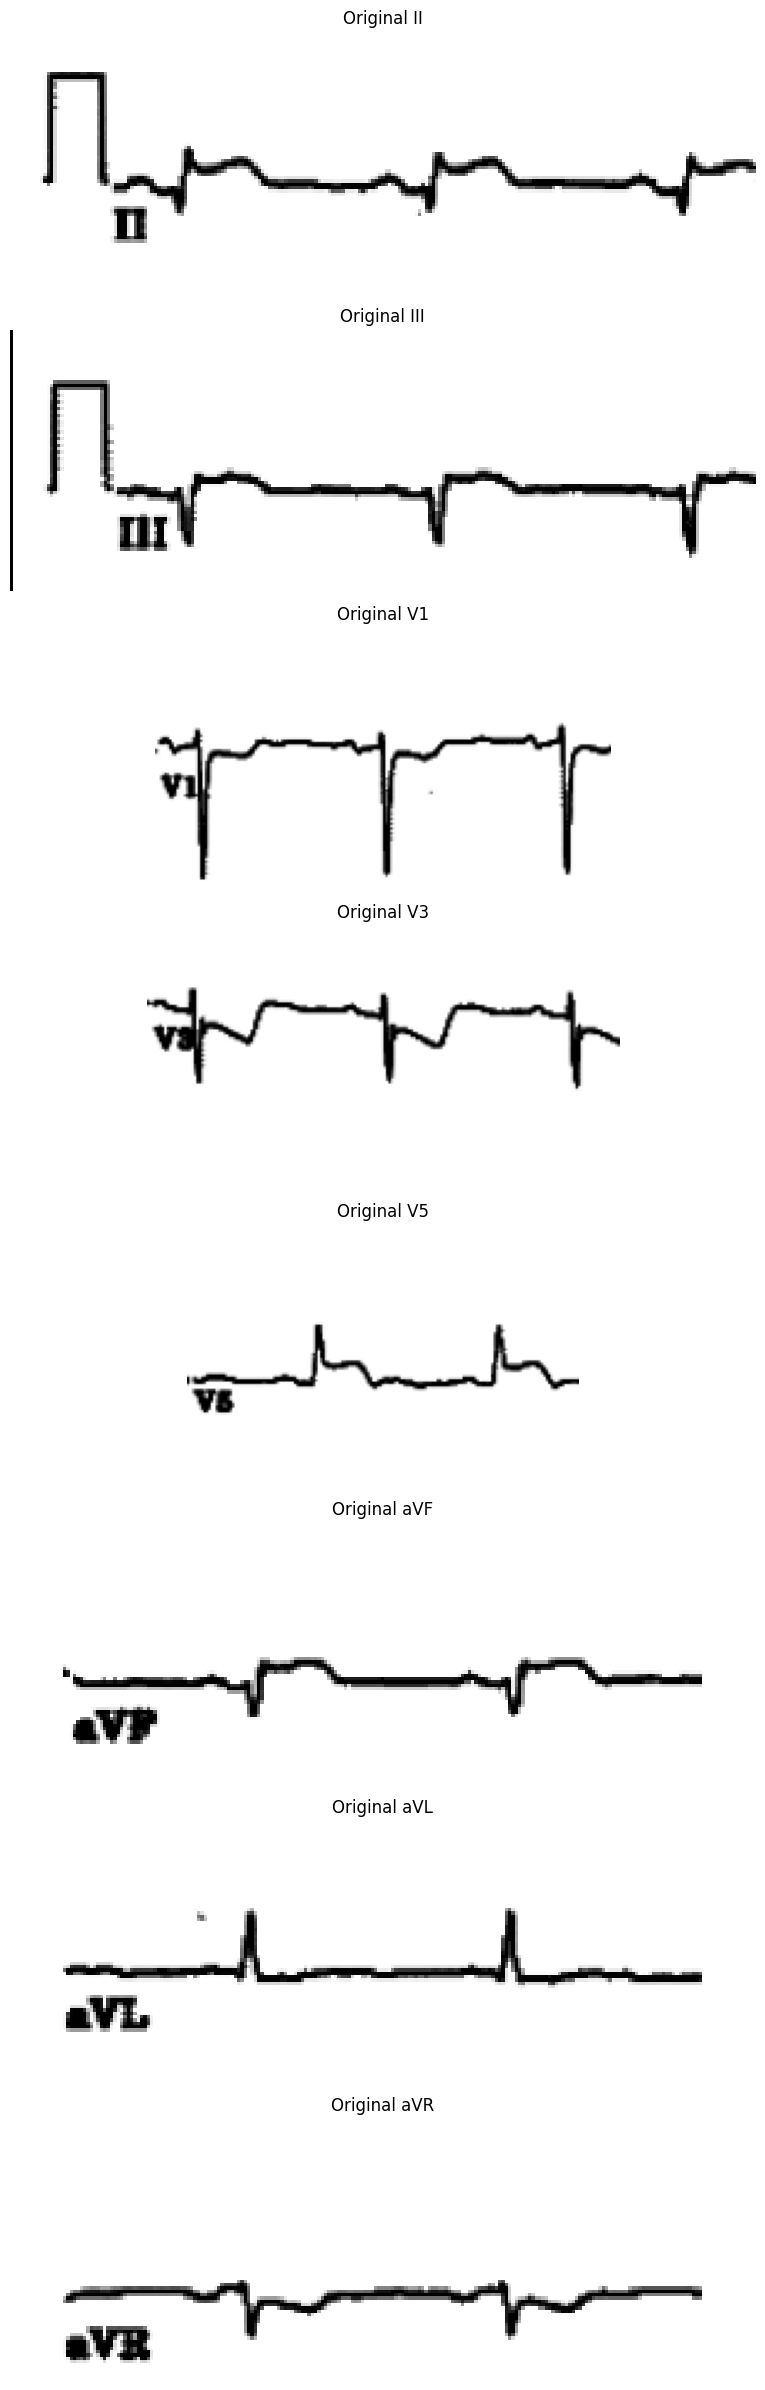

In [16]:
#Show the corresponding pictures
import pandas as pd
import matplotlib.pyplot as plt
import os
from glob import glob

folder_path="/content/drive/MyDrive/Model_Exp/ECG Pic to Time Series/ECG Picture"
foldercsv_path="/content/drive/MyDrive/Model_Exp/ECG Pic to Time Series"

import matplotlib.pyplot as plt
import cv2
import os

# Path to your folder containing both original images and generated plots
#folder_path = "/content/your_folder"  # Update this path

# List of ECG leads you provided
ecg_leads = ["II", "III", "V1", "V3", "V5", "aVF", "aVL", "aVR"]

# Plot side-by-side comparisons
fig, axes = plt.subplots(len(ecg_leads), 1, figsize=(10, len(ecg_leads) * 3))

for i, lead in enumerate(ecg_leads):
    # Load the original image
    original_img_path = os.path.join(folder_path, f"{lead}.png")
    original_img = cv2.imread(original_img_path, cv2.IMREAD_GRAYSCALE)
    # Convert BGR to RGB for correct color display (if needed)
    original_img = cv2.cvtColor(original_img, cv2.COLOR_GRAY2RGB)

    '''
    csv_files = glob(os.path.join(foldercsv_path, "*.csv"))
    for file in csv_files:
      lead_name = os.path.basename(file).replace("_ECG.csv", "")  # Extract lead name from filename
      df = pd.read_csv(file)
      '''

    # Show images
    axes[i].imshow(original_img, cmap="gray")
    axes[i].set_title(f"Original {lead}")
    axes[i].axis("off")
'''
    axes[i,1].plt.plot(df["Time"], df["Voltage"], color='b', linewidth=1)
    axes[i,1].plt.xlabel("Time (ms)")
    axes[i,1].plt.ylabel("Voltage (mV)")
    axes[i,1].plt.title(f"ECG Lead {lead_name}")
    axes[i,1].plt.grid()
    axes[i,1].plt.show()
'''
plt.tight_layout()
plt.show()
